# Tâche 8: structure de bande

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cnst

# Clé API MP
with MPRester("1ziZTLbVkqHKwpma ") as m:
    # Structure du matériau mp-7575
    structure = m.get_structure_by_material_id("mp-7575")

    #Création de la structure de bande du cristal
    bandstruct = m.get_bandstructure_by_material_id("mp-7575")

In [2]:
BSP = BSPlotter(bandstruct)

#données de la structure de bande
data = BSP.bs_plot_data()

## Bande interdite

In [3]:
BI = bandstruct.get_band_gap()
print(BI)

{'direct': True, 'energy': 0.5083000000000002, 'transition': '\\Gamma-\\Gamma'}


LiZnN a une bande interdite directe de largeur 0.5083 eV. Le matériau peut donc avoir un comportement photoélèctrique en théorie, mais la bande interdite est trop large pour être un semiconducteur.

## Maxima et minima de dispersion

In [4]:
# Indices de bande v = 9, c = 10

#tableau de distances sans doublons
dists = [0]*11
i = 0
for d in data.get('ticks').get('distance'):
    dists[i] = d
    if i == 0 or dists[i-1] != d : i+=1

disp_v = [0]*10
disp_c = [0]*10
max_v = 0
max_c = 0
min_v = 0
min_c = 0

en = data.get('energy')

#dispersion de chaque branche
for i in range(10):
    disp_v[i] = abs((en[i].get('1')[9][0] - en[i].get('1')[9][-1])/(dists[i+1] - dists[i]))
    disp_c[i] = abs((en[i].get('1')[10][0] - en[i].get('1')[10][-1])/(dists[i+1] - dists[i]))
    if disp_v[i] > disp_v[max_v] : max_v = i
    if disp_v[i] < disp_v[min_v] : min_v = i
    if disp_c[i] > disp_c[max_c] : max_c = i
    if disp_c[i] < disp_c[min_c] : min_c = i

print([max_v, min_v, max_c, min_c])

[0, 1, 1, 5]


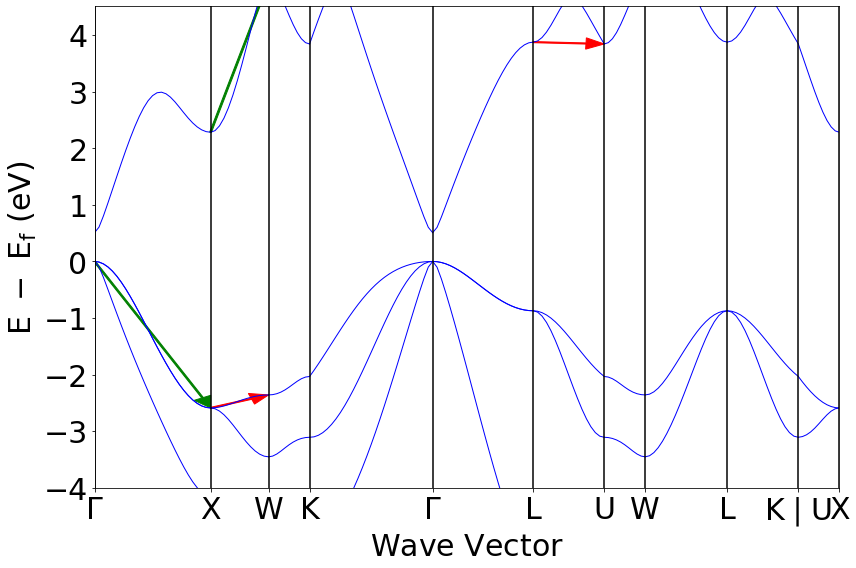

In [5]:
BSP.get_plot()

    
plt.arrow(dists[max_v],en[max_v].get('1')[9][0],dists[max_v+1],en[max_v].get('1')[9][-1],head_width=0.2, head_length=0.2, length_includes_head=True , color='green', width=0.02)
plt.arrow(dists[min_v],en[min_v].get('1')[9][0],dists[min_v+1]-dists[min_v],en[min_v].get('1')[9][-1]-en[min_v].get('1')[9][0],head_width=0.2, head_length=0.2,length_includes_head=True , color='red', width=0.02)

plt.arrow(dists[max_c],en[max_c].get('1')[10][0],dists[max_c+1]-dists[max_c],en[max_c].get('1')[10][-1]-en[max_c].get('1')[10][0],head_width=0.2, head_length=0.2,length_includes_head=True , color='green', width=0.02)
plt.arrow(dists[min_c],en[min_c].get('1')[10][0],dists[min_c+1]-dists[min_c],en[min_c].get('1')[10][-1]-en[min_c].get('1')[10][0],head_width=0.2, head_length=0.2,length_includes_head=True , color='red', width=0.02)

plt.show()

Comme indiqué sur la figure ci dessus: <br>
-Pour la dernière bande de valence la dispersion est maximale dans la direction $\Gamma - X$ et minimale dans la direction $X - W$. <br>
-Pour la première bande de conduction la dispersion est maximale dans la direction $X - W$ et minimale dans la direction $L - U$.

## Masse effective

On peut calculer la masse effective $m^*$ par la relation $m^* = \frac{\hbar^2}{\frac{d^2E}{dk^2}}$. 
La fonction polyfit de la librairie numpy permet de trouvé le polynome du second degré qui correspond le mieux au données. La dérivée seconde du polynome est 2 fois le coefficient du terme quadratique. En divisant $\hbar^2$ par la dérivée seconde on obtiens la masse effective.

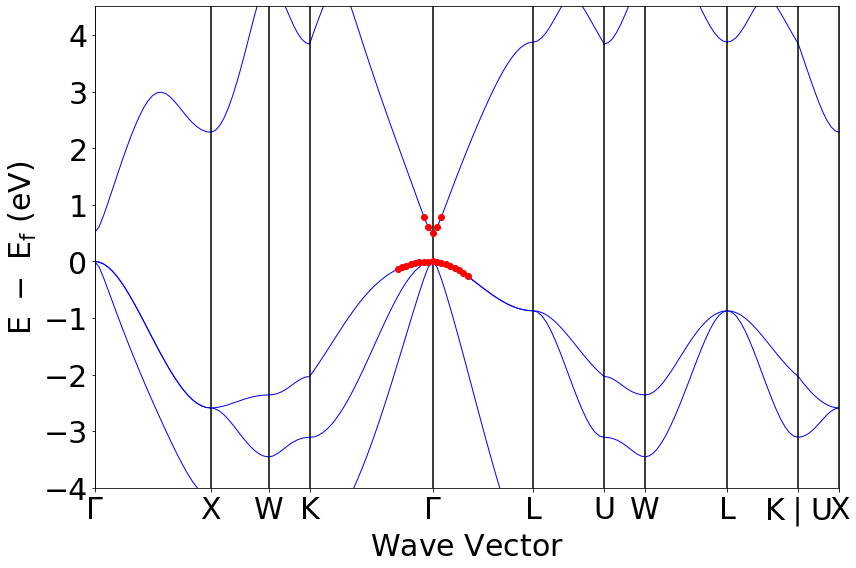

Masse effective d'un électron au sommet de la dernière bande de valence: (kg) -2.5456819019042994e-30
Masse effective d'un électron a la base de la première bande de conduction: (kg) 1.2017032421900575e-31


In [6]:
# Constante de Planck réduite [J.s]
hbar = cnst.hbar
# Electron volt [J]
eV = cnst.physical_constants['electron volt-joule relationship'][0]
# Angstrom [m]
A = cnst.physical_constants['Angstrom star'][0]

#Données utilisées pour calculer la masse effective
#Bande de valence:
xv = np.linspace(dists[3],dists[4], len(en[3].get('1')[9])).tolist()[-9:-1] + np.linspace(dists[4],dists[5], len(en[4].get('1')[9])).tolist()[0:9]
yv = en[3].get('1')[9][-9:-1]+ en[4].get('1')[9][0:9]

#Bande de conduction:
xc = np.linspace(dists[3],dists[4], len(en[3].get('1')[10])).tolist()[-3:-1] + np.linspace(dists[4],dists[5], len(en[4].get('1')[10])).tolist()[0:3]
yc = en[3].get('1')[10][-3:-1]+ en[4].get('1')[10][0:3]

#graph
BSP.get_plot()
plt.plot( xv, yv,'ro')
plt.plot(xc, yc, 'ro')
plt.show()

#paramètres parabole valence
paramv = np.polyfit(xv,yv,2)
paramc = np.polyfit(xc, yc, 2)

#passage en unités SI
pv = paramv[0]*eV*(A**2)
pc = paramc[0]*eV*(A**2)

mv = (hbar**2)/(2*pv)
mc = (hbar**2)/(2*pc)

print("Masse effective d'un électron au sommet de la dernière bande de valence: (kg)", mv)
print("Masse effective d'un électron a la base de la première bande de conduction: (kg)", mc)

Les données utilisées pour calculer les masses effectives sont représentées en rouge sur la figure ci dessus.